Let's import the CSV dataset file downloaded from the site FiveThrirtyEight with poll data. We will only keep the columns that are pertinent to the line graph aka the date, the weight adjusted approval ratings and the weight adjusted disapproval ratings.

In [2]:
import pandas as pd
file= pd.read_csv("approval_polllist.csv",usecols=['enddate','adjusted_approve','adjusted_disapprove'])

In [4]:
#format the raw data 'enddate' to a datetime format pandas understand and sort the table by date
file['enddate']=pd.to_datetime(file.enddate)
file.sort_values(by=['enddate'])

,enddate,adjusted_approve,adjusted_disapprove
0,2017-01-22,45.511646,38.171634
10628,2017-01-22,46.319300,37.448904
6659,2017-01-22,44.834014,43.847378
1,2017-01-22,45.748723,43.615311
3,2017-01-23,45.748723,44.615311
...,...,...,...
10627,2020-11-14,39.230781,56.691156
6656,2020-11-15,46.610661,48.529439
16088,2020-11-15,47.872510,47.882643
6658,2020-11-16,46.610661,47.529439


In [6]:
#Group poll entries by date taking the mean of all ratings for each day
file= file.groupby(['enddate'], as_index=False).mean()

In [7]:
file.dtypes
file.describe()

,adjusted_approve,adjusted_disapprove
count,1394.000000,1394.000000
mean,41.678735,53.273364
std,1.900096,1.900729
min,35.552530,40.770807
25%,40.656420,52.261262
50%,41.917493,53.253299
75%,42.876932,54.384487
max,47.241585,58.393691


<AxesSubplot:xlabel='enddate'>

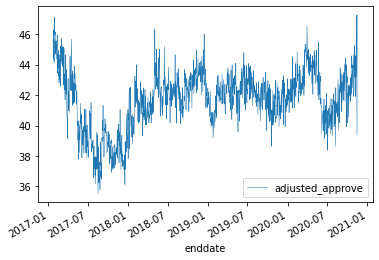

In [8]:
#line graph of approval ratings across time
daterange = pd.date_range('2017-01-22', '2020-11-16')
import matplotlib.pyplot as plt
file.plot(x='enddate',y='adjusted_approve',linewidth=0.5)

<AxesSubplot:xlabel='enddate'>

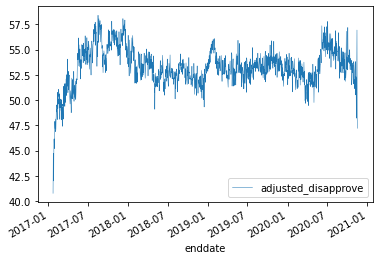

In [9]:
#line graph of disapproval ratings across time
file.plot(x='enddate', y='adjusted_disapprove', linewidth=0.5)

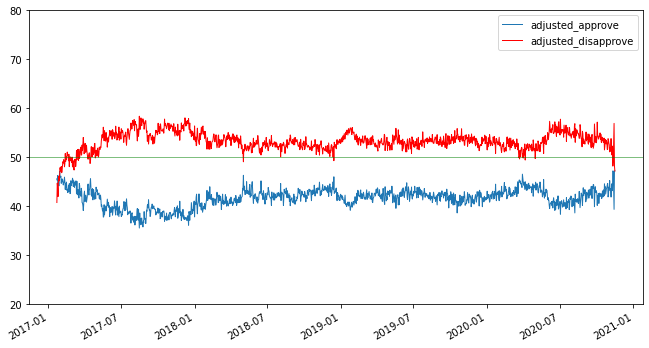

In [14]:
#Combine the two line graphs in one graph
fig, ax = plt.subplots(figsize=(11, 6))
ax = plt.gca()
ax.xaxis.label.set_visible(False)
file.plot(kind='line',x='enddate', y='adjusted_approve', linewidth=1, ylim=(20,80), ax=ax)
file.plot(kind='line',x='enddate', y='adjusted_disapprove', color='red',linewidth=1,ylim=(20,80), ax=ax)
plt.axhline(y=50, color='g', linewidth=0.5)
plt.show()

Below is the same graph published on Tableau for further interactivity:

In [16]:
%%HTML
<div class='tableauPlaceholder' id='viz1612437290028' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HowpopularisDonaldTrump&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HowpopularisDonaldTrump&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HowpopularisDonaldTrump&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1612437290028');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>